In [1]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from tifffile import imread
from csbdeep.utils import Path, download_and_extract_zip_file, plot_some
from csbdeep.io import save_tiff_imagej_compatible
from csbdeep.models import CARE

Using TensorFlow backend.


image size = (128, 512, 512)
image axes = ZYX


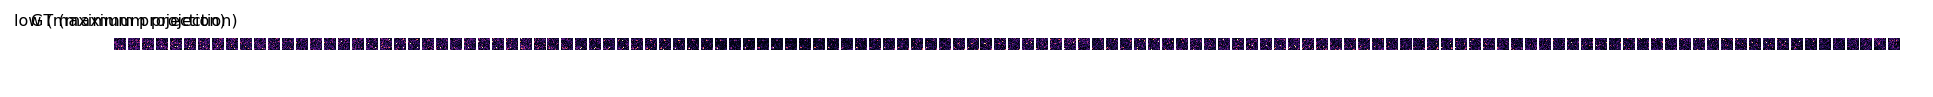

In [8]:
x = imread('C:\\Users\\User\\Desktop\\C2-L14390-A5-V1-Layer-1-Cell-1_A01_G001_0001.tif')

axes = 'ZYX'
print('image size =', x.shape)
print('image axes =', axes)

plt.figure(figsize=(16,10))
plot_some(np.stack([x]),
          title_list=[['low (maximum projection)','GT (maximum projection)']], 
          pmin=2,pmax=99.8);

In [5]:
model = CARE(config=None, name='Juan-Iba1', basedir='models/Juan')

Loading network weights from 'weights_best.h5'.


In [9]:
%%time
restored = model.predict(x, axes, n_tiles=(1,4,4))

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:07<00:00,  2.27it/s]


Wall time: 9.47 s


In [10]:
Path('results').mkdir(exist_ok=True)
save_tiff_imagej_compatible('results/%stest.tif' % model.name, restored, axes)

plt.figure(figsize=(16,10))
plot_some(np.stack([x,restored,y]),
          title_list=[['low (maximum projection)','CARE (maximum projection)','GT (maximum projection)']], 
          pmin=2,pmax=99.8);

NameError: name 'y' is not defined

<Figure size 1152x720 with 0 Axes>